In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [6]:
data=pd.read_csv(r"C:\Users\Dell\Downloads\AutoInsurance.csv")
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


# EDA

In [7]:
data.shape

(9134, 24)

In [8]:
#Understand the data
print(data.keys()) # Print name of variables
print("Data Shape:", data.shape) #print no of rows & columns
print(data.head()) #print top 5 observations
print(data.dtypes) #print data type of variables
data.describe() # Descriptive stats about data

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')
Data Shape: (9134, 24)
  Customer       State  Customer Lifetime Value Response  Coverage Education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bach

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [9]:
#Missing Value Detection 
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

## No  NULL value in variables so no need to  handel null value with mean mode median

In [10]:
data.rename(columns={'Customer Lifetime Value':'CLV'},inplace=True)

# Numericle columns

In [11]:
numerical_cols = data.select_dtypes(include=["int64","float64"])

In [12]:
numerical_cols 

,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [13]:
numerical_cols.columns

Index(['CLV', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Total Claim Amount'],
      dtype='object')

In [14]:
#### Checking Outliers

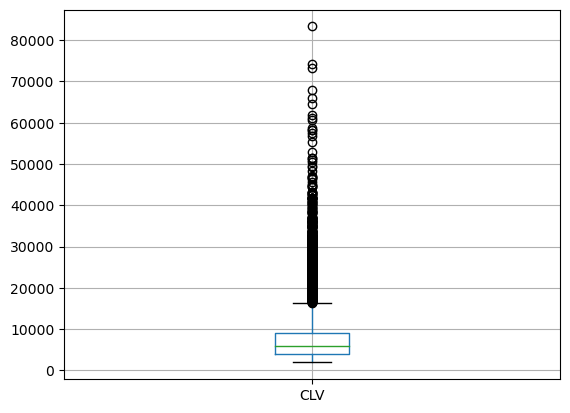

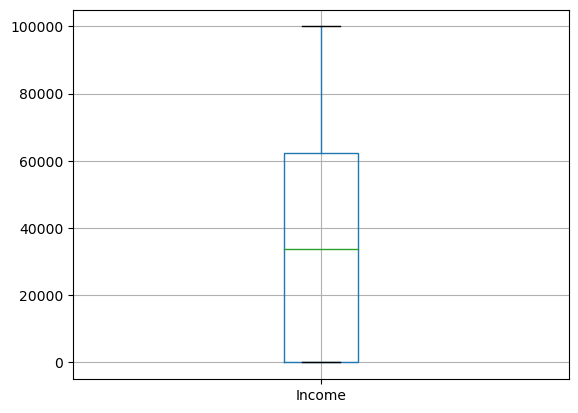

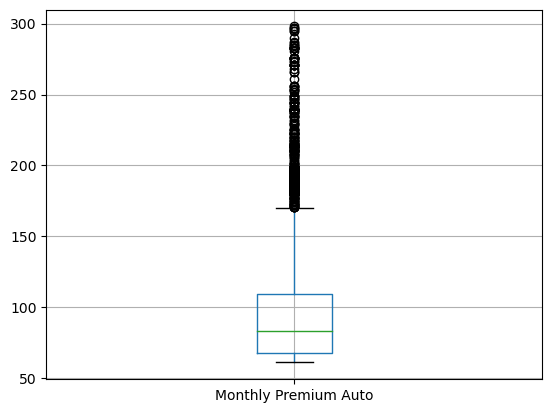

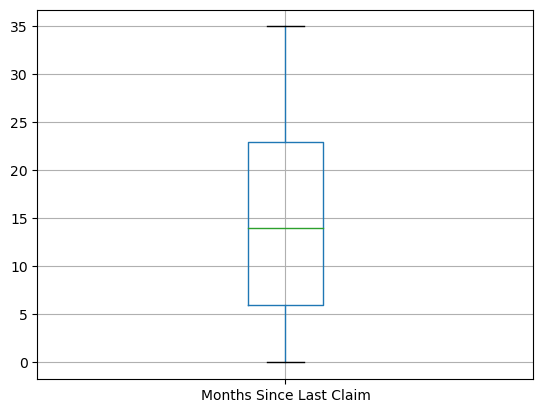

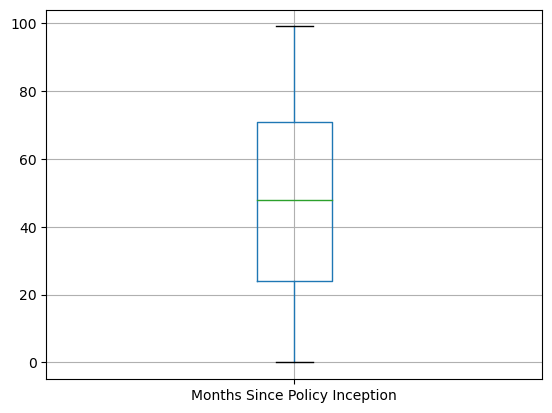

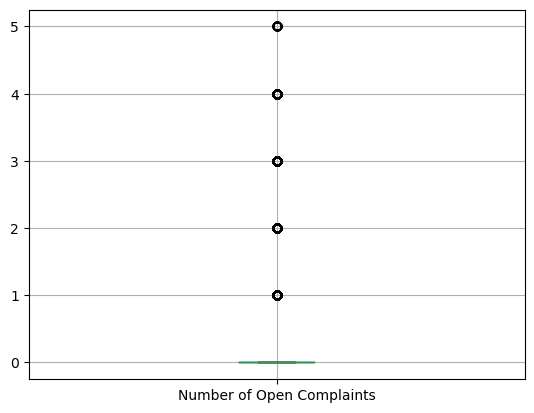

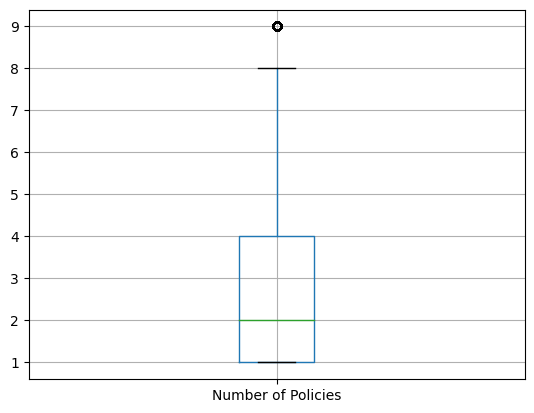

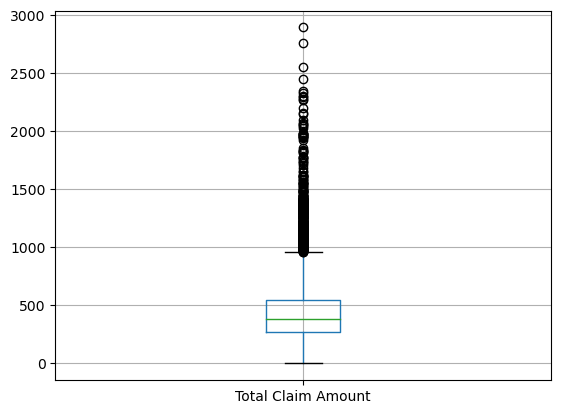

In [15]:
for column in numerical_cols:
    plt.figure()
    data.boxplot([column])

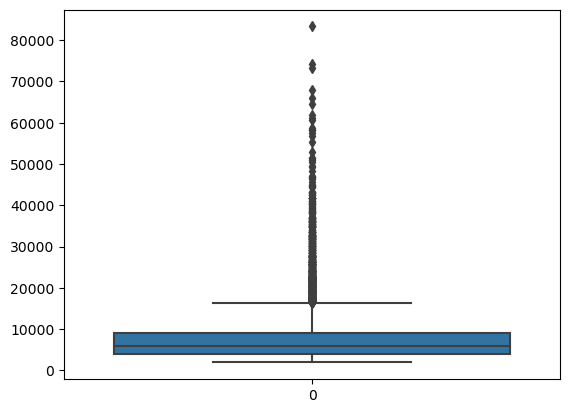

In [16]:
sns.boxplot(data["CLV"])
plt.show()

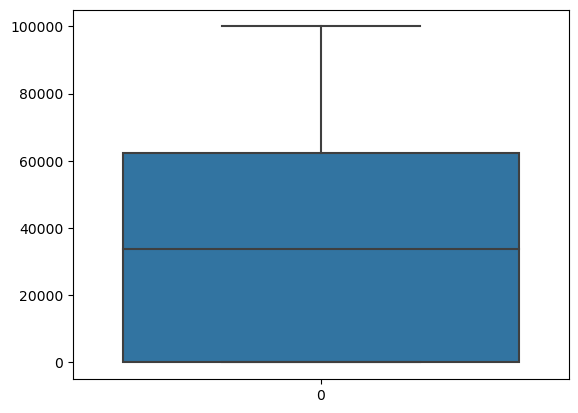

In [17]:
sns.boxplot(data["Income"])
plt.show()

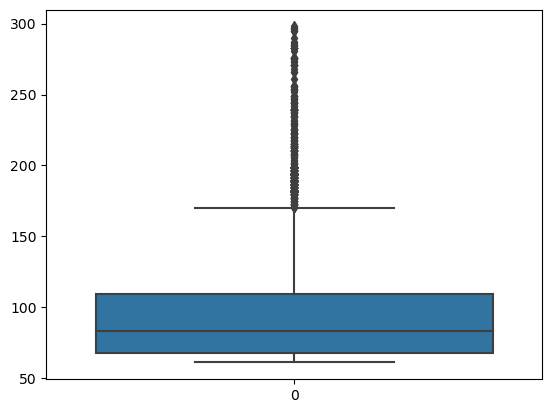

In [18]:
sns.boxplot(data["Monthly Premium Auto"])
plt.show()

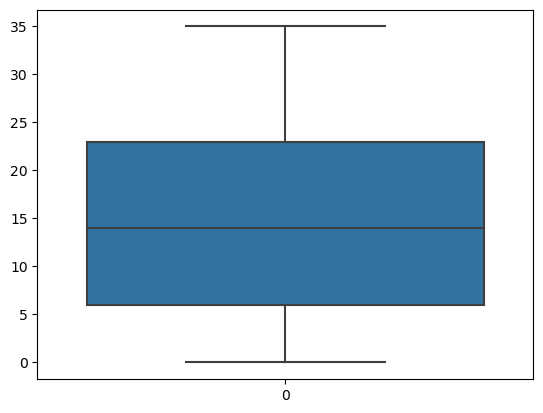

In [19]:
sns.boxplot(data["Months Since Last Claim"])
plt.show()

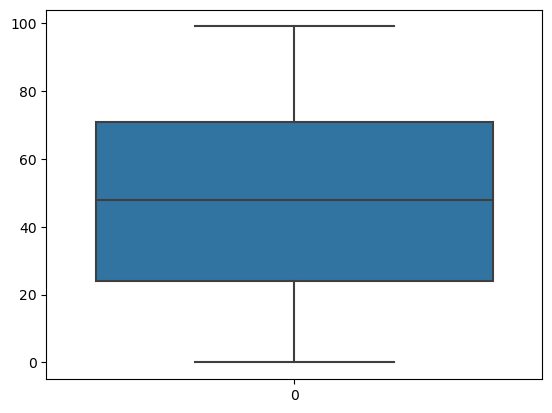

In [20]:
sns.boxplot(data["Months Since Policy Inception"])
plt.show()

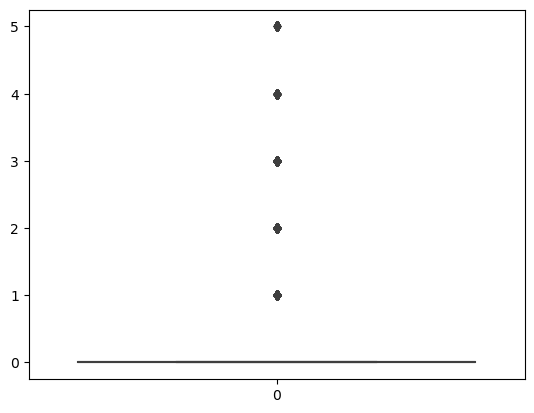

In [21]:
sns.boxplot(data["Number of Open Complaints"])
plt.show()

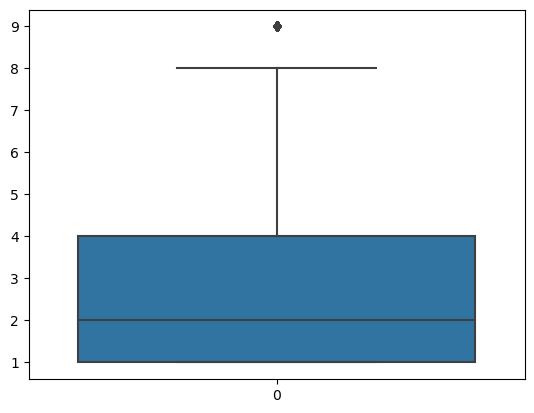

In [22]:
sns.boxplot(data["Number of Policies"])
plt.show()

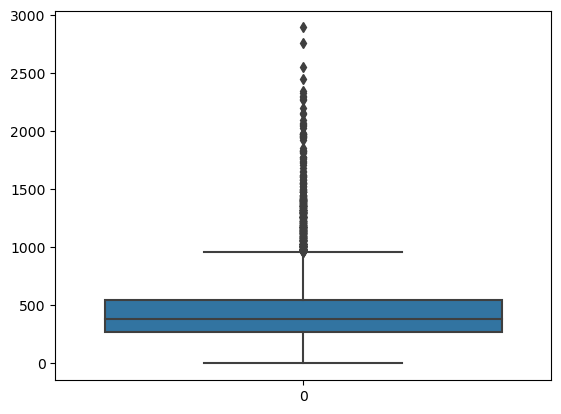

In [23]:
sns.boxplot(data["Total Claim Amount"])
plt.show()

In [24]:
#Outlier Treatment
# #IQR
Q1 = data[['CLV', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Total Claim Amount']].quantile(0.25)
Q3 = data[['CLV', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Total Claim Amount']].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

CLV                               4967.915247
Income                           62320.000000
Monthly Premium Auto                41.000000
Months Since Last Claim             17.000000
Months Since Policy Inception       47.000000
Number of Open Complaints            0.000000
Number of Policies                   3.000000
Total Claim Amount                 275.256594
dtype: float64


In [25]:
UL=(Q3 + 1.5 * IQR)
LL=(Q3 - 1.5 * IQR)


outlier_col=['CLV', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Total Claim Amount']
for i in range(len(outlier_col)):
    a=data[data[outlier_col[i]]>UL[i]]
    data.loc[a.index,outlier_col[i]]=UL[i]
    
    b=data[data[outlier_col[i]]<LL[i]]
    data.loc[b.index,outlier_col[i]]=LL[i]

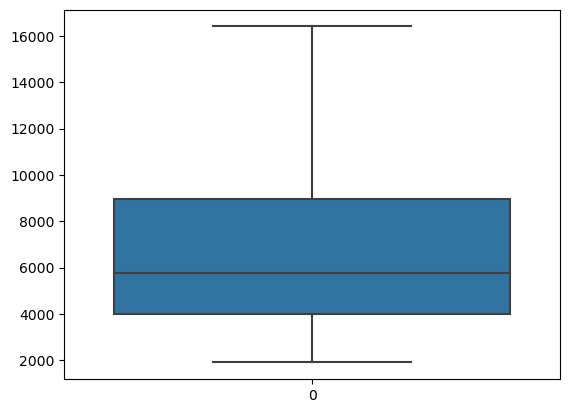

In [26]:
sns.boxplot(data["CLV"])
plt.show()

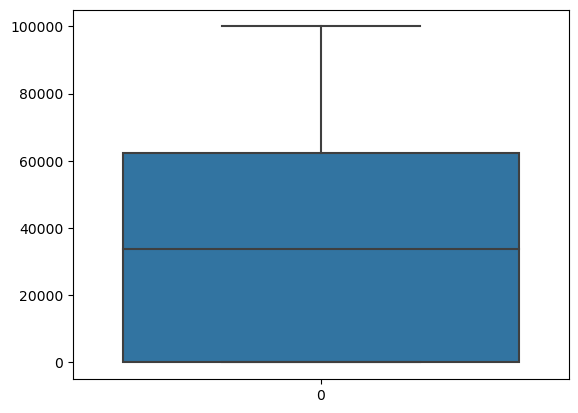

In [27]:
sns.boxplot(data["Income"])
plt.show()

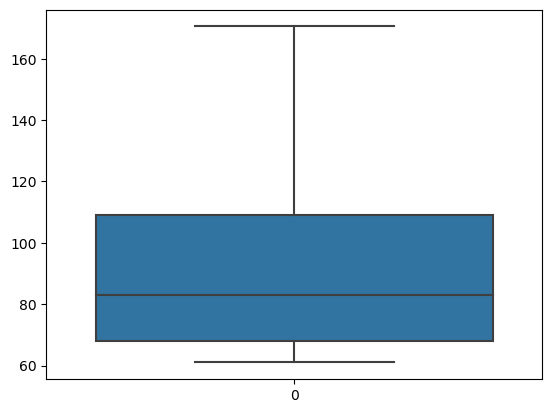

In [28]:
sns.boxplot(data["Monthly Premium Auto"])
plt.show()

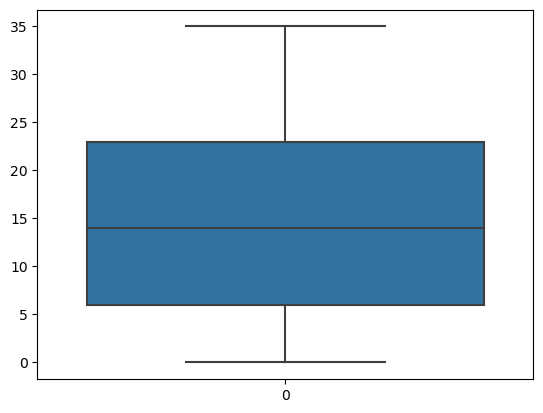

In [29]:
sns.boxplot(data["Months Since Last Claim"])
plt.show()

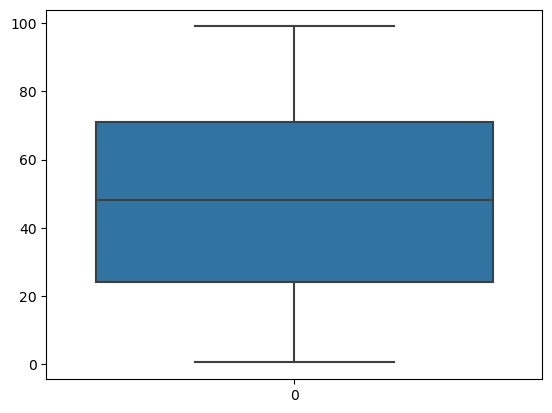

In [30]:
sns.boxplot(data["Months Since Policy Inception"])
plt.show()

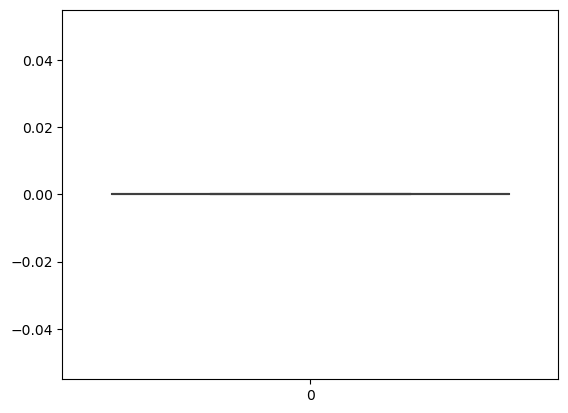

In [31]:
sns.boxplot(data["Number of Open Complaints"])
plt.show()

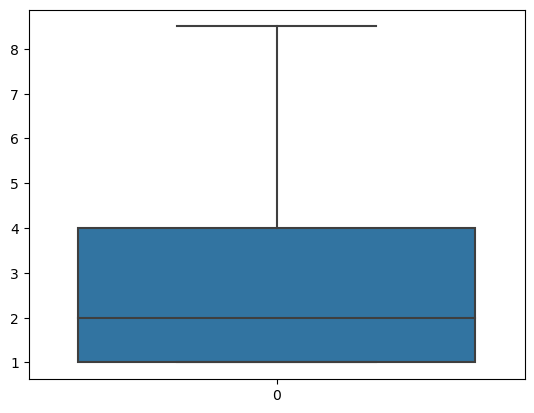

In [32]:
sns.boxplot(data["Number of Policies"])
plt.show()

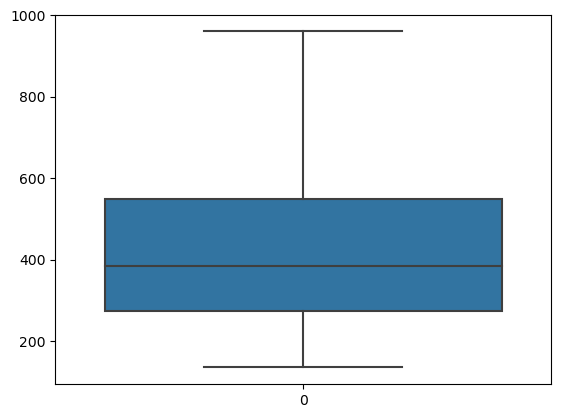

In [33]:
sns.boxplot(data["Total Claim Amount"])
plt.show()

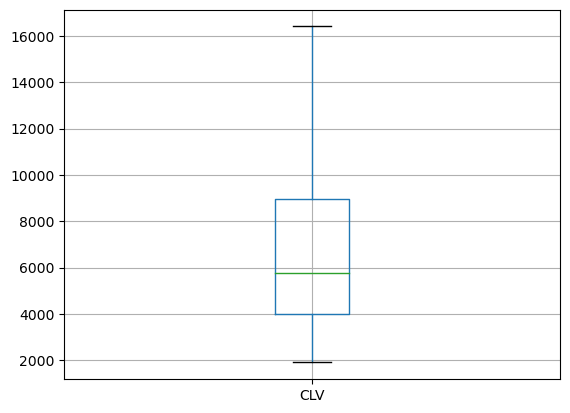

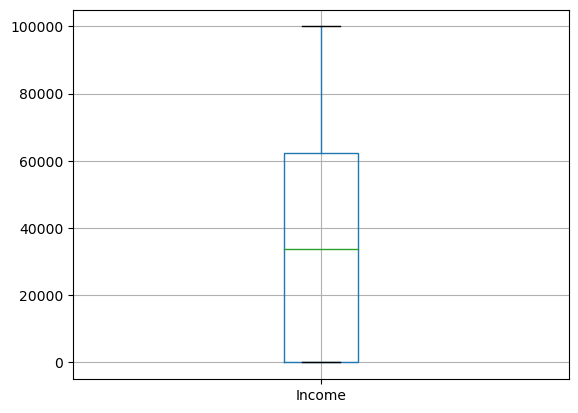

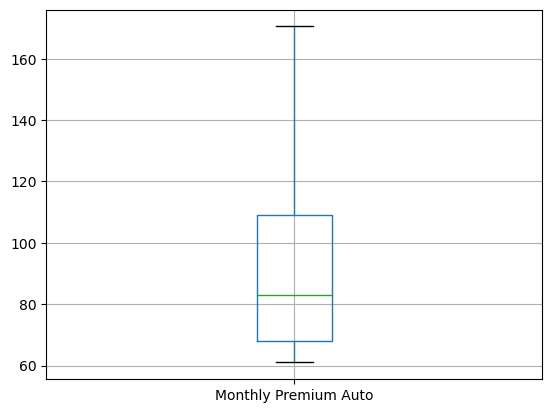

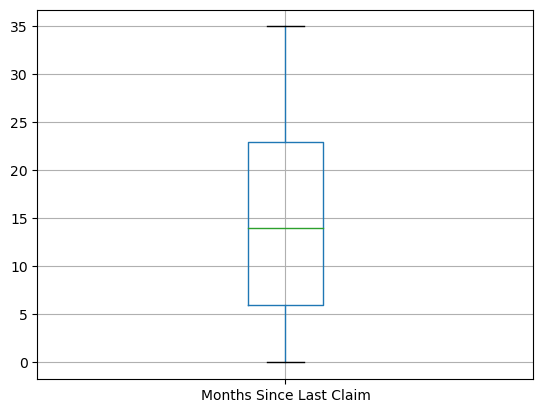

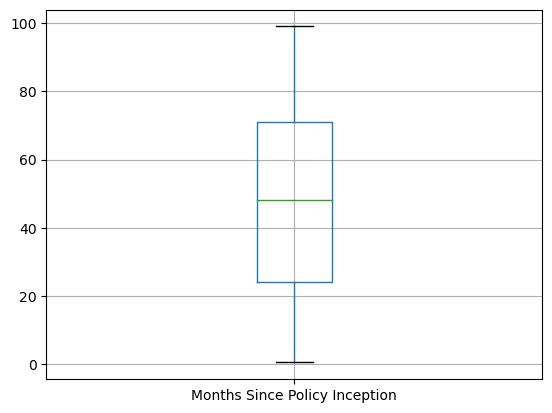

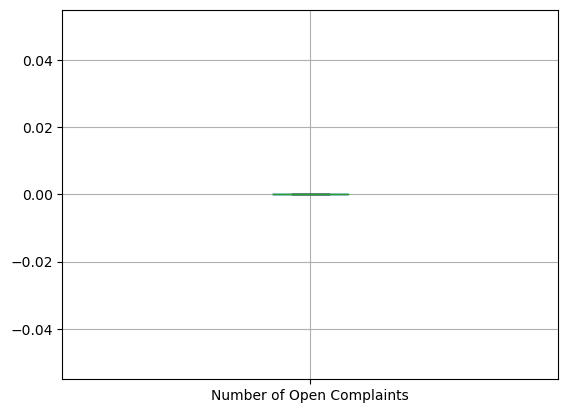

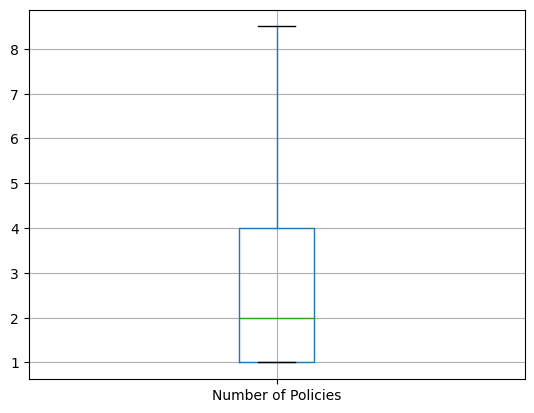

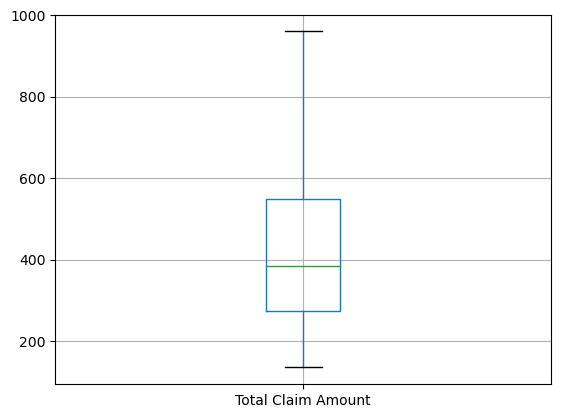

In [34]:
for column in numerical_cols:
    plt.figure()
    data.boxplot([column])

# Categoricle column

In [35]:
cat_cols = data.select_dtypes(include=["object"])

In [36]:
cat_cols

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,3/2/2011,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,10/2/2011,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,12/2/2011,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,6/2/2011,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,3/2/2011,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [37]:
cat_cols.head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,3/2/2011,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [38]:
cat_cols.shape

(9134, 16)

In [39]:
cat_cols.columns

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Location Code',
       'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [40]:
cat_cols.drop("Customer",axis=1,inplace=True)

In [41]:
cat_cols.drop("Effective To Date",axis=1,inplace=True)

In [42]:
cat_cols.head()

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [43]:
catg=pd.get_dummies(cat_cols,drop_first=True)


In [40]:
catg

,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,Education_High School or Below,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
9130,1,0,0,0,1,1,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
9131,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
9132,1,0,0,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [44]:
numerical_cols.head()

,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [45]:
dfn = pd.concat([numerical_cols,catg],axis=1)
dfn

,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State_California,State_Nevada,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,2763.519279,56274,69,32,5,0,1,384.811147,0,0,...,0,0,0,0,0,0,0,1,1,0
1,6979.535903,0,94,13,42,0,8,1131.464935,0,0,...,0,0,0,0,0,0,0,0,1,0
2,12887.431650,48767,108,18,38,0,2,566.472247,0,1,...,0,0,0,0,0,0,0,1,1,0
3,7645.861827,0,106,18,65,0,7,529.881344,1,0,...,0,1,0,0,0,1,0,0,1,0
4,2813.692575,43836,73,12,44,0,1,138.130879,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764,1,0,...,0,0,1,0,0,0,0,0,1,0
9130,3096.511217,21604,79,14,28,0,1,379.200000,1,0,...,1,0,0,0,0,0,0,0,1,0
9131,8163.890428,0,85,9,37,3,2,790.784983,1,0,...,1,0,0,0,0,0,0,0,1,0
9132,7524.442436,21941,96,34,3,0,3,691.200000,1,0,...,1,0,0,0,0,0,0,0,0,0


In [46]:
dfn.dtypes

CLV                               float64
Income                              int64
Monthly Premium Auto                int64
Months Since Last Claim             int64
Months Since Policy Inception       int64
Number of Open Complaints           int64
Number of Policies                  int64
Total Claim Amount                float64
State_California                    uint8
State_Nevada                        uint8
State_Oregon                        uint8
State_Washington                    uint8
Response_Yes                        uint8
Coverage_Extended                   uint8
Coverage_Premium                    uint8
Education_College                   uint8
Education_Doctor                    uint8
Education_High School or Below      uint8
Education_Master                    uint8
EmploymentStatus_Employed           uint8
EmploymentStatus_Medical Leave      uint8
EmploymentStatus_Retired            uint8
EmploymentStatus_Unemployed         uint8
Gender_M                          

# OLS

In [47]:
import statsmodels.api as sm

In [48]:
y=dfn['CLV']
X=dfn.drop(['CLV'],axis=1)
X_constant=sm.add_constant(X)
lin_reg=sm.OLS(y,X_constant).fit()
lin_reg.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CLV   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     38.60
Date:                Sat, 28 Oct 2023   Prob (F-statistic):          6.92e-323
Time:                        19:11:00   Log-Likelihood:                -92812.
No. Observations:                9134   AIC:                         1.857e+05
Df Residuals:                    9085   BIC:                         1.861e+05
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           1486.6386    903.661      1.645      0.100    -284.740    3258.017
Income                            -0.0012      0.004     -0.307      0.759      -0.009       0.006
Monthly Premium Auto              69.5779     10.026      6.940      0.000      49.926      89.230
Months Since Last Claim            7.0626      6.554      1.078      0.281      -5.785      19.911
Months Since Policy Inception     -1.3200      2.380     -0.555      0.579      -5.985       3.345
Number of Open Complaints       -264.2647     72.496     -3.645      0.000    -406.373    -122.157
Number of Policies                57.7126     27.753      2.080      0.038       3.311     112.114
Total Claim Amount                -0.2268      0.474     -0.478      0.632      -1.156       0.703
State_California                  39.9647    189.426      0.211      0.833    -331.354     411.283
State_Nevada                      45.7021    261.160      0.175      0.861    -466.231     557.635
State_Oregon                      84.9912    196.050      0.434      0.665    -299.312     469.294
State_Washington                 164.3324    269.980      0.609      0.543    -364.888     693.553
Response_Yes                    -215.9162    207.436     -1.041      0.298    -622.538     190.705
Coverage_Extended                130.1678    249.287      0.522      0.602    -358.490     618.826
Coverage_Premium                  61.7491    527.605      0.117      0.907    -972.476    1095.974
Education_College                 -1.5962    171.219     -0.009      0.993    -337.225     334.032
Education_Doctor                -197.9744    362.976     -0.545      0.585    -909.488     513.540
Education_High School or Below   388.9735    173.415      2.243      0.025      49.041     728.906
Education_Master                 157.9503    262.899      0.601      0.548    -357.390     673.291
EmploymentStatus_Employed        700.4418    354.477      1.976      0.048       5.587    1395.296
EmploymentStatus_Medical Leave   210.8226    436.143      0.483      0.629    -644.116    1065.761
EmploymentStatus_Retired          64.6393    502.732      0.129      0.898    -920.829    1050.108
EmploymentStatus_Unemployed        9.1563    357.613      0.026      0.980    -691.846     710.158
Gender_M                        -143.5239    132.973     -1.079      0.280    -404.181     117.133
Location Code_Suburban           -73.7895    263.381     -0.280      0.779    -590.076     442.497
Location Code_Urban              128.8756    241.416      0.534      0.593    -344.355     602.106
Marital Status_Married          -177.6388    194.800     -0.912      0.362    -559.490     204.212
Marital Status_Single           -490.7108    225.714     -2.174      0.030    -933.161     -48.260
Policy Type_Pe

# Check Multicolinearity

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns)

,vif
Income,3.183923
Monthly Premium Auto,27.569851
Months Since Last Claim,1.009934
Months Since Policy Inception,1.022048
Number of Open Complaints,1.009196
Number of Policies,1.019460
Total Claim Amount,4.396905
State_California,1.878492
State_Nevada,1.378696
State_Oregon,1.813907


In [53]:
# import statsmodels.tsa.api as smt #timeseries analysis

# acf = smt.graphics.plot_acf(lin_reg.resid, lags=40 , alpha=0.05)#auto_correlation value, lags= previous value
# acf.show()

In [54]:
#spliting data

from sklearn.model_selection import train_test_split
X=dfn.drop(['CLV','Policy Type_Personal Auto','Policy Type_Special Auto','Policy_Personal L1','Policy_Personal L2','Policy_Personal L3',
'Policy_Special L1','Policy_Special L2','Policy_Special L3'],axis=1)
y=dfn['CLV']          
y =np.log(y)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [55]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6393, 42)
(6393,)
(2741, 42)
(2741,)


# LinearRegression

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
lr = LinearRegression()
model = lr.fit(X_train,y_train)
print(f'R^2 score for train: {lr.score(X_train, y_train)}')
print(f'R^2 score for test: {lr.score(X_test, y_test)}')

R^2 score for train: 0.26073373730563176
R^2 score for test: 0.2548416026499791


In [58]:
y_pred = model.predict(X_test)

In [59]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [60]:
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred)) 

RMSE: 0.5772314153487261
MAE 0.4455033282270872
R-squared: 0.2548416026499791


# DecisionTreeRegressor

In [61]:
from sklearn.tree import DecisionTreeRegressor

In [62]:
dt = DecisionTreeRegressor(random_state=1)

dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred)) 

RMSE: 0.2627100067543976
MAE 0.10268224523068381
R-squared: 0.8456516778647619


In [63]:
from sklearn.model_selection import train_test_split
X=dfn.drop(['CLV','Policy Type_Personal Auto','Policy Type_Special Auto','Policy_Personal L1','Policy_Personal L2','Policy_Personal L3',
'Policy_Special L1','Policy_Special L2','Policy_Special L3'],axis=1)
y=np.log(dfn['CLV'])         
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

# RandomForestRegressor

In [81]:
from sklearn.ensemble import RandomForestRegressor

In [82]:
rf = RandomForestRegressor(random_state=1)

rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred)) 

RMSE: 0.1967510247193028
MAE 0.08921910299130022
R-squared: 0.9134269561154746


# HyperParameter tuning

In [66]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestRegressor()
params = {
        'max_depth' : [10,20,30],
        
        'n_estimators' : [100,200,50],
        
        "bootstrap" : [True, False],
    
        'max_features': ['auto', 'sqrt', 'log2']
        
        }

grid = GridSearchCV(estimator = rf, param_grid=params, cv = 5, n_jobs = -1, return_train_score = True )
grid.fit(X,y)
grid.best_params_

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


{'bootstrap': True,
 'max_depth': 30,
 'max_features': 'auto',
 'n_estimators': 200}

In [61]:
rf = RandomForestRegressor(**grid.best_params_)

rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred))

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RMSE: 0.1969582597614327
MAE 0.08943102748306998
R-squared: 0.9132444877709756


# Adaboost Regressor

In [68]:
from sklearn.ensemble import AdaBoostRegressor

In [71]:
adaboost = AdaBoostRegressor(
    RandomForestRegressor(max_depth=5,criterion='squared_error'),
    n_estimators=150
)
adaboost.fit(X_train, y_train)

AdaBoostRegressor(estimator=RandomForestRegressor(max_depth=5),
                  n_estimators=150)

In [72]:
y_pred = adaboost.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred))

RMSE: 0.21660354401907597
MAE 0.12841373148386673
R-squared: 0.8950748018719015


In [84]:
important_feature=rf.feature_importances_
list_feature=X_train.columns
df_feature_importance=pd.DataFrame(important_feature,index=list_feature,columns=["Importance"]).sort_values("Importance",ascending=False)
df_feature_importance

,Importance
Number of Policies,0.671813
Monthly Premium Auto,0.231608
Total Claim Amount,0.014253
Income,0.013190
Months Since Policy Inception,0.012810
Months Since Last Claim,0.012805
Number of Open Complaints,0.003263
Coverage_Extended,0.003206
EmploymentStatus_Employed,0.002816
Gender_M,0.001936


In [85]:
pd.DataFrame(rf.feature_importances_,index=X.columns,columns=['Score']).sort_values("Score",ascending=False)[:10]

,Score
Number of Policies,0.671813
Monthly Premium Auto,0.231608
Total Claim Amount,0.014253
Income,0.013190
Months Since Policy Inception,0.012810
Months Since Last Claim,0.012805
Number of Open Complaints,0.003263
Coverage_Extended,0.003206
EmploymentStatus_Employed,0.002816
Gender_M,0.001936


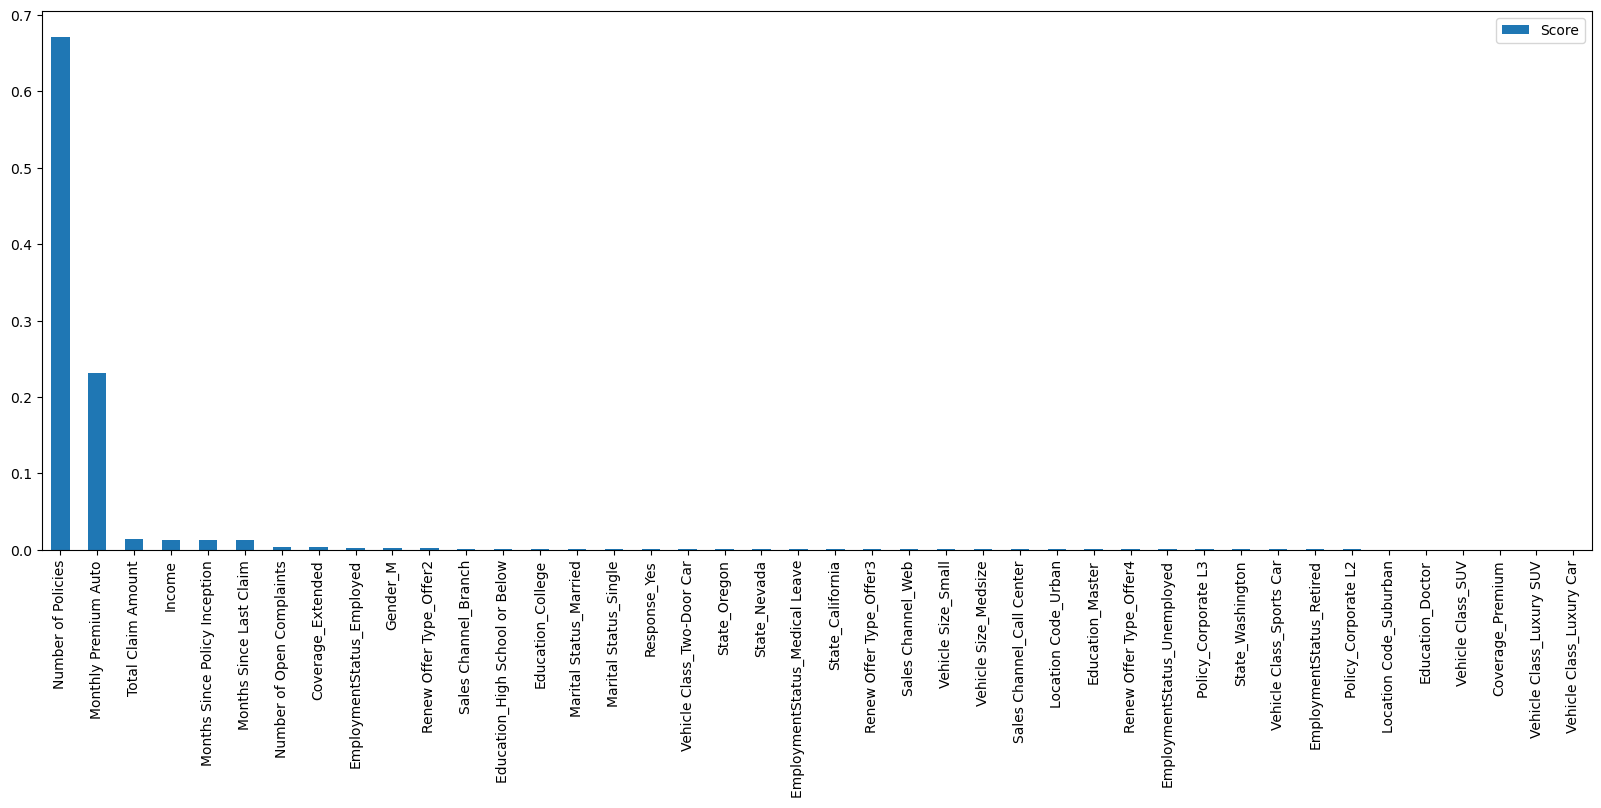

In [86]:
pd.DataFrame(rf.feature_importances_,index=X.columns,columns=['Score']).sort_values("Score",ascending=False).plot(kind='bar',figsize=(20,7))
plt.show()